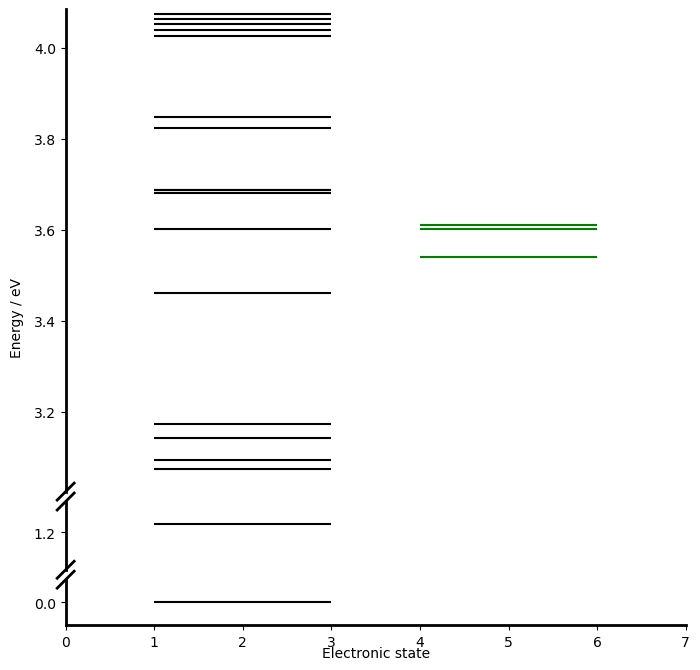

In [37]:
"""
 @author Le Nhan Pham
 @website https://lenhanpham.github.io/
 @create date 2023-02-01 18:10:21
 @modify date 2023-02-01 18:10:21
"""


import matplotlib.pyplot as plt
from brokenaxes import brokenaxes


def extractData2files(tdFile,):
    """
    This function is used when TDDFT runs for an openshell doublet with 50-50 keyword 
    """
    ss = "Excitation energies and oscillator strengths"
    with open(tdFile, "r") as f:
        numDstates = 0
        numQstates = 0
        Denergies, Dstates, Qenergies, Qstates = [], [], [], []
        for line in f:
            if "Excited State" in line:
                tempState = line.split()[8].split("=")[
                    1
                ]  ### Extract the oscillator strenght
                tempEnergy = float(line.split()[4])
                if str(tempState) != "0.0000":
                    Denergies.append(tempEnergy)
                    numDstates += 1
                    Dstates.append(numDstates)
                elif str(tempState) == "0.0000":
                    Qenergies.append(tempEnergy)
                    numQstates += 1
                    Qstates.append(numQstates)
    return Dstates, Denergies, Qstates, Qenergies


output = "PC-doublet-Jablonski-diagram"
inputLog = "PC-doublet-tddft"


doubletStates, doubletEnergies, quartetStates, quartetEnergies = extractData2files(
    inputLog + ".log"
)


for i in range(len(doubletStates)):
    doubletStates[i] = 2

for j in range(len(quartetStates)):
    quartetStates[j] = 5


fig = plt.figure(figsize=(8, 8))


doubletSize = len(doubletStates)
quartetSize = len(quartetStates)
### Change the intervals here to have more broken places in axes 
baxes = brokenaxes(
    ylims=(
        (-0.05, 0.05),
        (
            min(doubletEnergies[0:doubletSize] + quartetEnergies[0:quartetSize]) - 0.1,
            min(doubletEnergies[0:doubletSize] + quartetEnergies[0:quartetSize]) + 0.05,
        ),
        (
            min(doubletEnergies[1:doubletSize] + quartetEnergies[1:quartetSize]) - 0.05,
            max(doubletEnergies[1:doubletSize] + quartetEnergies[1:quartetSize]) + 0.01,
        ),
    ),
    hspace=0.05,
)
# baxes.scatter(doubletStates[0:n], doubletEnergies[0:n])
# baxes.scatter(quartetStates[0:n], quartetEnergies[0:n], )
baxes.set_ylabel("Energy / eV")
baxes.set_xlabel("Electronic state")
baxes.set_xlim([0, 7])
for i in range(doubletSize):
    baxes.hlines(doubletEnergies[i], 1, 3, "k")
baxes.hlines(0, 1, 3, "k")
for j in range(quartetSize):
    baxes.hlines(quartetEnergies[j], 4, 6, "g")
baxes.axs[1].xaxis.set_ticks([], minor=False)
# baxes.axs[1].xaxis.set_tick_params(width=10)
# baxes.axs[0].yaxis.set_tick_params(width=10)
plt.rcParams["axes.linewidth"] = 2

plt.savefig(output + ".pdf")
plt.savefig(output + ".svg")

